<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,24.661995,0.049681,34.711676,34.670864,0.040812
1,0.0,1.0,74.586618,0.012591,84.599209,84.589584,0.009624
2,0.0,2.0,49.163639,-0.005296,59.158343,59.169611,-0.011268
3,0.0,3.0,83.139399,0.004577,93.143976,93.141354,0.002622
4,0.0,4.0,60.320667,-0.002188,70.318479,70.325320,-0.006841
...,...,...,...,...,...,...,...
19995,999.0,15.0,61.288090,0.008083,71.296173,71.292760,0.003412
19996,999.0,16.0,88.180198,0.005443,98.185641,98.180992,0.004649
19997,999.0,17.0,39.478942,0.005524,49.484466,49.486756,-0.002290
19998,999.0,18.0,90.262767,-0.011814,100.250953,100.263261,-0.012307


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,24.661995,0.049681,34.711676,34.670864,0.040812
1,0.0,1.0,74.586618,0.012591,84.599209,84.589584,0.009624
2,0.0,2.0,49.163639,-0.005296,59.158343,59.169611,-0.011268
3,0.0,3.0,83.139399,0.004577,93.143976,93.141354,0.002622
4,0.0,4.0,60.320667,-0.002188,70.318479,70.325320,-0.006841
...,...,...,...,...,...,...,...
19995,999.0,15.0,61.288090,0.008083,71.296173,71.292760,0.003412
19996,999.0,16.0,88.180198,0.005443,98.185641,98.180992,0.004649
19997,999.0,17.0,39.478942,0.005524,49.484466,49.486756,-0.002290
19998,999.0,18.0,90.262767,-0.011814,100.250953,100.263261,-0.012307


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    24.661995  0.049681   34.711676   34.670864  0.040812
      1.0    74.586618  0.012591   84.599209   84.589584  0.009624
      2.0    49.163639 -0.005296   59.158343   59.169611 -0.011268
      3.0    83.139399  0.004577   93.143976   93.141354  0.002622
      4.0    60.320667 -0.002188   70.318479   70.325320 -0.006841
...                ...       ...         ...         ...       ...
999.0 15.0   61.288090  0.008083   71.296173   71.292760  0.003412
      16.0   88.180198  0.005443   98.185641   98.180992  0.004649
      17.0   39.478942  0.005524   49.484466   49.486756 -0.002290
      18.0   90.262767 -0.011814  100.250953  100.263261 -0.012307
      19.0   87.192013 -0.013105   97.178907   97.192949 -0.014042

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    24.661995  0.049681   34.711676   34.670864  0.040812
      1.0    74.586618  0.012591   84.599209   84.589584  0.009624
      2.0    49.163639 -0.005296   59.158343   59.169611 -0.011268
      3.0    83.139399  0.004577   93.143976   93.141354  0.002622
      4.0    60.320667 -0.002188   70.318479   70.325320 -0.006841
...                ...       ...         ...         ...       ...
999.0 15.0   61.288090  0.008083   71.296173   71.292760  0.003412
      16.0   88.180198  0.005443   98.185641   98.180992  0.004649
      17.0   39.478942  0.005524   49.484466   49.486756 -0.002290
      18.0   90.262767 -0.011814  100.250953  100.263261 -0.012307
      19.0   87.192013 -0.013105   97.178907   97.192949 -0.014042

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,24.661995,0.049681,34.711676,34.670864,0.040812
1,0.0,1.0,74.586618,0.012591,84.599209,84.589584,0.009624
2,0.0,2.0,49.163639,-0.005296,59.158343,59.169611,-0.011268
3,0.0,3.0,83.139399,0.004577,93.143976,93.141354,0.002622
4,0.0,4.0,60.320667,-0.002188,70.318479,70.325320,-0.006841
...,...,...,...,...,...,...,...
19995,999.0,15.0,61.288090,0.008083,71.296173,71.292760,0.003412
19996,999.0,16.0,88.180198,0.005443,98.185641,98.180992,0.004649
19997,999.0,17.0,39.478942,0.005524,49.484466,49.486756,-0.002290
19998,999.0,18.0,90.262767,-0.011814,100.250953,100.263261,-0.012307


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    24.661995  0.049681   34.711676   34.670864  0.040812
      1.0    74.586618  0.012591   84.599209   84.589584  0.009624
      2.0    49.163639 -0.005296   59.158343   59.169611 -0.011268
      3.0    83.139399  0.004577   93.143976   93.141354  0.002622
      4.0    60.320667 -0.002188   70.318479   70.325320 -0.006841
...                ...       ...         ...         ...       ...
999.0 15.0   61.288090  0.008083   71.296173   71.292760  0.003412
      16.0   88.180198  0.005443   98.185641   98.180992  0.004649
      17.0   39.478942  0.005524   49.484466   49.486756 -0.002290
      18.0   90.262767 -0.011814  100.250953  100.263261 -0.012307
      19.0   87.192013 -0.013105   97.178907   97.192949 -0.014042

[20000 rows x 5 columns]

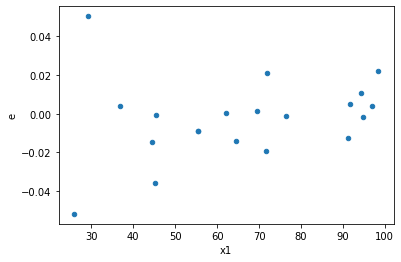

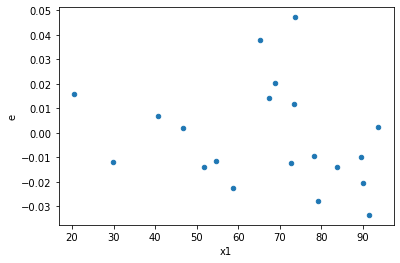

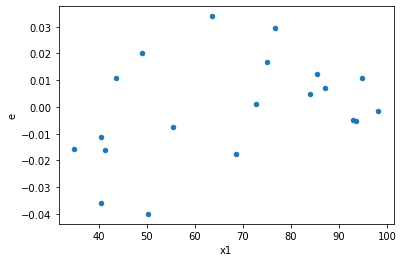

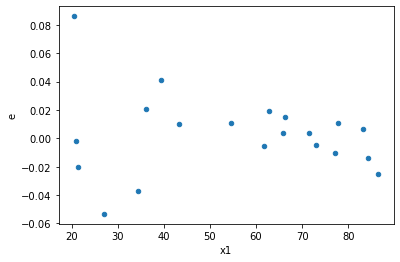

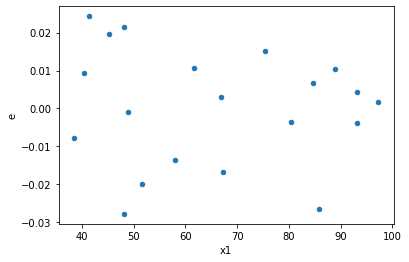

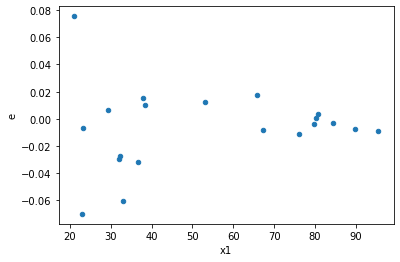

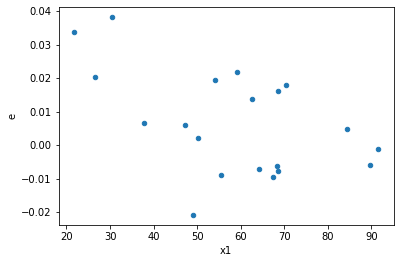

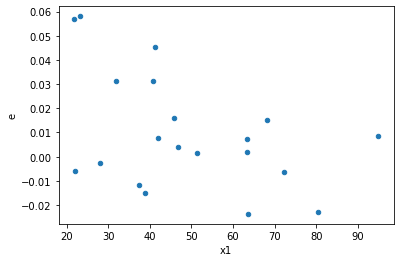

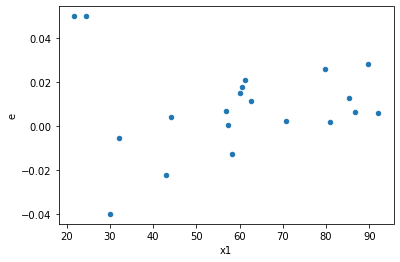

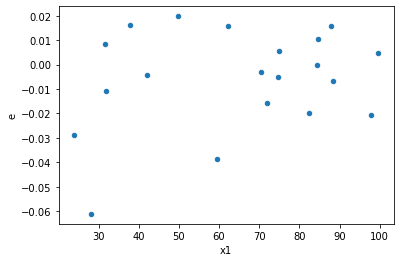

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
7.0,7.0,7.0,0.00021562882855777045,0.0009426544903648006,3.080411836539578e-05,0.00013466492719497151,4.371653348347381,0.07033321770730017,0.9648333911463499,0.03516660885365008,Reject005=1 : Homoscedasticity
11.0,7.0,7.0,0.0027115175447225163,0.003320773866732675,0.0003873596492460738,0.00047439626667609644,1.2246920080587222,0.7959872457272796,0.6020063771363602,0.3979936228636398,Reject005=1 : Homoscedasticity
21.0,7.0,7.0,0.002435788156072134,0.0026495159669016975,0.00034796973658173343,0.0003785022809859568,1.0877448271914638,0.9145061321491945,0.5427469339254027,0.45725306607459726,Reject005=1 : Homoscedasticity
58.0,7.0,7.0,0.0008052428063662245,0.00121619586407332,0.00011503468662374635,0.00017374226629618858,1.5103467605771992,0.5998462094450066,0.7000768952774967,0.2999231047225033,Reject005=1 : Homoscedasticity
81.0,7.0,7.0,0.0006970105283394127,0.0009812686320131512,9.95729326199161e-05,0.00014018123314473588,1.4078246914734085,0.6630953567069842,0.6684523216465079,0.3315476783534921,Reject005=1 : Homoscedasticity
132.0,7.0,7.0,0.0008534033489415602,0.0013688514394320883,0.0001219147641345086,0.00019555020563315548,1.6039911738450716,0.5481540332462422,0.7259229833768789,0.2740770166231211,Reject005=1 : Homoscedasticity
210.0,7.0,7.0,0.0013513355632400166,0.0013718157173852746,0.00019304793760571666,0.00019597367391218208,1.0151554911321612,0.9846795654648499,0.507660217267575,0.49233978273242496,Reject005=1 : Homoscedasticity
222.0,7.0,7.0,0.0017841235693826542,0.0018019563011955676,0.0002548747956260935,0.0002574223287422239,1.0099952335807567,0.9898697754558747,0.5050651122720626,0.49493488772793737,Reject005=1 : Homoscedasticity
270.0,7.0,7.0,0.0013205493931465338,0.003489152964685601,0.0001886499133066477,0.0004984504235265144,2.6421979994037446,0.22319796341074838,0.8884010182946258,0.11159898170537419,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,0.0055338173866313276,0.0002127895995303901,0.0007905453409473325,3.0398514218627158e-05,0.03845258790874635,0.0003383272362095649,Reject005=0 : Heteroscedasticity
1.0,7.0,7.0,0.012853347533752259,0.0005971545837493222,0.0018361925048217512,8.53077976784746e-05,0.046459070851482355,0.0006291605418333304,Reject005=0 : Heteroscedasticity
2.0,7.0,7.0,0.00875478205849882,0.0008181350678558188,0.001250683151214117,0.00011687643826511697,0.09345007818459666,0.005726751067249306,Reject005=0 : Heteroscedasticity
3.0,7.0,7.0,0.005052583926604479,0.0002515781136654841,0.0007217977038006399,3.5939730523640585e-05,0.049791971260644406,0.0007881155200977852,Reject005=0 : Heteroscedasticity
4.0,7.0,7.0,0.0029587726419890307,0.0008177259218185585,0.0004226818059984329,0.00011681798883122264,0.2763733550236031,0.11142193395655459,Reject005=1 : Homoscedasticity
5.0,7.0,7.0,0.00309469021176374,0.0019094774204065892,0.00044209860168053426,0.0002727824886295127,0.6170173069821845,0.5394924792174889,Reject005=1 : Homoscedasticity
6.0,7.0,7.0,0.005014687279390357,0.00115904909516341,0.0007163838970557652,0.00016557844216620143,0.2311308822639719,0.07218439022758068,Reject005=1 : Homoscedasticity
7.0,7.0,7.0,0.00021562882855777045,0.0009426544903648006,3.080411836539578e-05,0.00013466492719497151,4.371653348347381,0.07033321770730017,Reject005=1 : Homoscedasticity
8.0,7.0,7.0,0.008097975477083033,0.0006534937300707764,0.0011568536395832904,9.335624715296806e-05,0.08069840812930827,0.0036509128672640315,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    549
Reject005=1 : Homoscedasticity      451
Name: Result_test, dtype: int64